<a href="https://colab.research.google.com/github/rhudaina/CENTREX-for-STEM-DepEd-QCSHS/blob/main/Intro_to_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Dependencies

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for matrix algebra and random number capabilities.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display

# What is a Digital Image?

A *digital image* is defined as a two-dimensional representation, i.e., picture, of some subject, usually a physical object or a person. The building blocks of digital images are *pixels* (picture elements). Because the pixels are so small and close together, our brain is able to assemble it into a meaningful image.

The number of pixels used to represent the image determines the amount of detail in the image, known as *resolution* in terms of number of pixels (height) $\times$ number of pixels (width).

## Black & White Image

In a black & white image, a black pixel is assigned a $0$ (no light), and a white pixel is assigned a $1$ (full light intensity).
The entire image is represented by matrix consisting of $1$s and $0$s.

Black and white images are called a $1$-bit image where each pixel is described by one bit (binary digit).

In [ ]:
img_height = 10;
img_width  = 10;
numPixels = img_height * img_width;

p = 0.4   # probability of white pixels
Img = np.random.binomial(1,p,numPixels).reshape((img_height,img_width))
print(Img)

In [ ]:
plt.pcolormesh(Img, cmap='gray',edgecolors='gray')
ax = plt.gca()
ax.set_aspect('equal')
ax.axis("off")
plt.show()

### White Square

In [ ]:
Img = np.zeros((25,20))
Img[5:15,5:15] = 1;
print(Img)

In [ ]:
plt.pcolormesh(Img, cmap='gray')
ax = plt.gca()
ax.set_aspect('equal')
ax.axis("off")
plt.show()

### Activity.

Adjust the pixel height/width of the white square so that it appears in the middle of the black rectangle.

In [ ]:
# Write your code here.


### Circle

In [ ]:
img_height = 50;
img_width  = 50;

cx = 25;
cy = 25;
rad = 10;

Img = np.zeros((img_height,img_width))

for i in range(img_height):
  for j in range(img_width):
    if (i-cx)**2 + (j-cy)**2 < rad**2:
      Img[i,j] = 1;

plt.pcolormesh(Img, cmap='gray')
ax = plt.gca()
ax.set_aspect('equal')
ax.axis("off")
plt.show()

### Activity.

Increase the image resolution and adjust the circle parameters so that the white circle in the resulting appears rounder and in the center.

In [ ]:
# Write your code here.


## Grayscale Image

*What happens if we allow different light intensities (shades of gray)?*

Each pixel in a digital grayscale image has a value corresponding to the light intensity, which fall between $0$ (black) and $1$ (white).
For an $8$-bit grayscale image, each pixel is assigned a number between $0$ (abscense of light) and $255$ (full saturation of light), that is, there are $255$ levels of increasing light intensities.

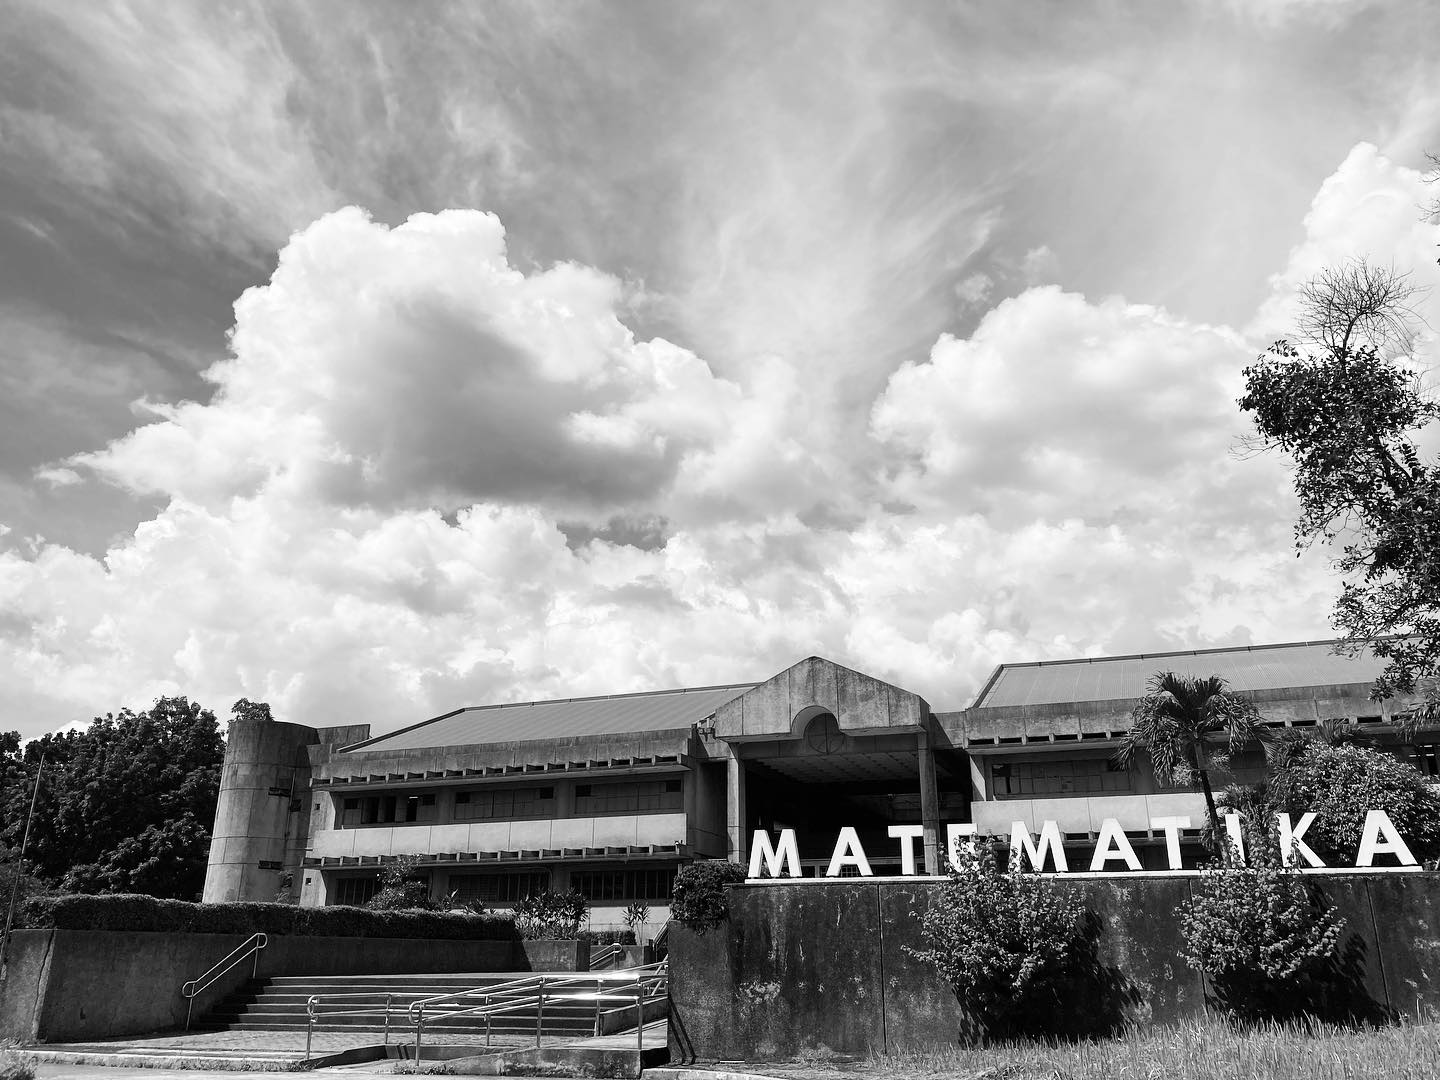

Image Resolution: (1080, 1440)


In [ ]:
Img = cv.imread('UPD-IMath.jpg',cv.IMREAD_GRAYSCALE);  # read grayscale image as a matrix
cv2_imshow(Img)
print("Image Resolution:", Img.shape)

In [ ]:
ImgWindow = Img[800:900,1100:1200]
cv2_imshow(ImgWindow)

In [ ]:
print(ImgWindow[50,:])

### Activity.

Move the image window to the letter K.

In [ ]:
# Write your code here.


## Color Image

Because light also makes color, digital color images are possible.

The electromagnetic energy spectrum is comprised of energy waves (light). Howeover, our eyes are capable of detecting only a small portion of light, called the *visible spectrum*. This spectrum is bounded by the colors we see as *violet* and *red*. Dividing this spectrum into thirds yields the predominant colors: RED, BLUE, and GREEN (RGB). The remaining colors can be created by combining red, blue, and green light.

Image Source: [https://upd.edu.ph/sites-of-interest/](https://upd.edu.ph/sites-of-interest/)

(2560, 1920, 3)


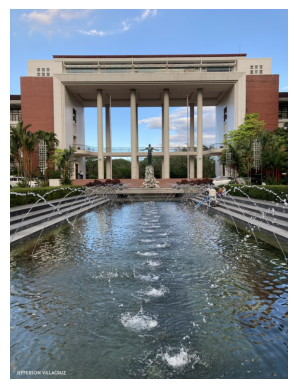

In [ ]:
Img = cv.imread('UPD-OblationPlaza.jpg', cv.IMREAD_COLOR);  # OpenCV assumes images are in BGR channel order
print(Img.shape)

plt.imshow(cv.cvtColor(Img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

This is the blue channel.

In [ ]:
B = Img[:,:,0]
print(B.shape)

plt.imshow(B, cmap = 'Blues')
plt.axis("off")
plt.colorbar()
plt.show()

This is the green channel.

In [ ]:
G = Img[:,:,1]
print(G.shape)

plt.imshow(G, cmap = 'Greens')
plt.axis("off")
plt.colorbar()
plt.show()

This is the red channel.

In [ ]:
R = Img[:,:,2]
print(R.shape)

plt.imshow(R, cmap = 'Reds')
plt.axis("off")
plt.colorbar()
plt.show()

# Editing Digital Images

What happens if the red channel is replaced by a zero matrix?

In [ ]:
Img2 = cv.imread('UPD-OblationPlaza.jpg', cv.IMREAD_COLOR);
Img2[:,:,2] = np.zeros(R.shape)

plt.imshow(cv.cvtColor(Img2, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

What happens if the green channel is replaced by a zero matrix?

In [ ]:
Img1 = cv.imread('UPD-OblationPlaza.jpg', cv.IMREAD_COLOR);
Img1[:,:,1] = np.zeros(G.shape)

plt.imshow(cv.cvtColor(Img1, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

What happens if the blue channel is replaced by a zero matrix?

In [ ]:
Img0 = cv.imread('UPD-OblationPlaza.jpg', cv.IMREAD_COLOR);
Img0[:,:,0] = np.zeros(B.shape)

plt.imshow(cv.cvtColor(Img0, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Image Tinting

Tinting a digital image involves adjusting the R, G, and B values, resulting in an edited image that has an overall different color or "feel".

In [ ]:
Img = cv.imread('UPD-OblationPlaza.jpg', cv.IMREAD_COLOR)
B = Img[:,:,0]
G = Img[:,:,1]
R = Img[:,:,2]

ImgTinted = Img
ImgTinted[:,:,0] = 0.50*B
ImgTinted[:,:,1] = 0.66*G
ImgTinted[:,:,2] = 0.84*R

plt.imshow(cv.cvtColor(ImgTinted, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### Activity

Tint the NASA image of planet Mars to make it appear redder.

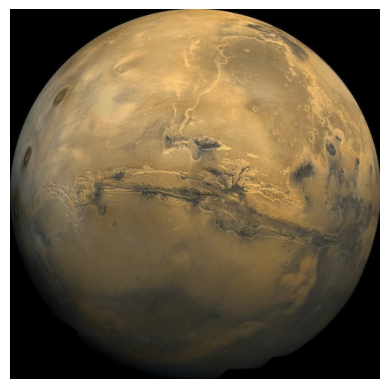

In [ ]:
Img = cv.imread('mars.jpg', cv.IMREAD_COLOR);
plt.imshow(cv.cvtColor(Img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
# Write your code here.


References:


1.  Tony F. Chan and J. Shen. (2005). Image Processing and Analysis, Society for Industrial and Applied Mathematics, https://epubs.siam.org/doi/abs/10.1137/1.9780898717877
2.   Jason Silverman, Gail L. Rosen, & Steve Essinger. (2013). Applications in Digital Image Processing. The Mathematics Teacher, 107(1), 46–53. https://doi.org/10.5951/mathteacher.107.1.0046





Image Sources:


1.   https://upd.edu.ph/sites-of-interest/
2.   https://research.coe.drexel.edu/ece/dk12/MT/mars.jpg